# Damion Samuels

# Machine Learning - Linear Regression on Boston Housing Dataset

## Data Background and Problem Statement
https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155

We will take the Housing dataset which contains information about different houses in Boston. This data was originally a part of UCI Machine Learning Repository and has been removed now. We can also access this data from the scikit-learn library. There are 506 samples and 13 feature variables in this dataset. The objective is to predict the value of prices of the house using the given features.Open-source ML library for Python. Built on NumPy, SciPy, and Matplotlib. ... Scikit-learn is a library in Python that provides many unsupervised and supervised learning algorithms.

# Task 1 : Environment Set up

In [ ]:
#import required libraries
import numpy as np
import pandas as pd

# Task 2 : Data Collection

In [ ]:
# import the boston dataset
from sklearn.datasets import load_boston
boston_dataset = load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
# create a pandas dataframe and store the data
df_boston = pd.DataFrame(boston_dataset.data)
df_boston.columns = boston_dataset.feature_names
#Show names of the columns
df_boston.columns


Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [ ]:
df_boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [ ]:
#append Price, target, as a new columnn to the dataset
#target = train-y and test-y
df_boston['Price'] = boston_dataset.target

In [ ]:
#print top 5 observations
#target is price
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


We want first to check to see if we have missing data , we use isnull().sum()

In [ ]:
df_boston.isnull().sum() #sum to count of the NaN values For one column

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

In [ ]:
#Mean price of Boston housing
df_boston["Price"].mean()

22.532806324110698

# Task 3 : Data Wrangling and EDA (Exploratory Data Analysis)

In [ ]:
#import libraries
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


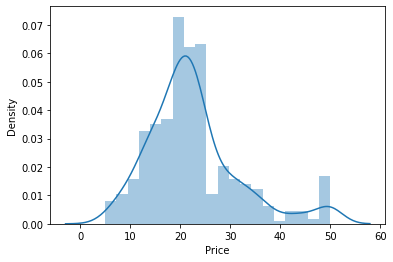

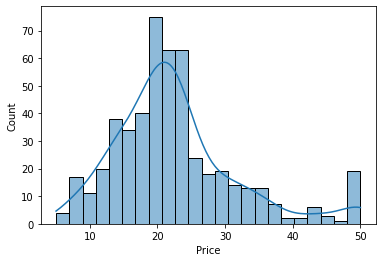

In [ ]:
#sns.set(rc={'figure.figsize':(12,12)})
#. rc parameter set aesthetics of your plots 
# set figure size by passing dictionary to rc parameter with key 'figure.figsize' in seaborn set method:
#distribution plot
sns.distplot(df_boston['Price'], bins=20)
plt.show()
#histogram on frequency of price
sns.histplot(df_boston['Price'], kde = True)
plt.show()

#  Create a correlation matrix that measures the linear relationships between the variables
# A perfect negative correlation is represented by the value -1.0, while a 0 indicates no correlation, and +1.0 indicates a perfect positive correlation. A perfect negative correlation means the relationship that exists between two variables is exactly opposite all of the time.


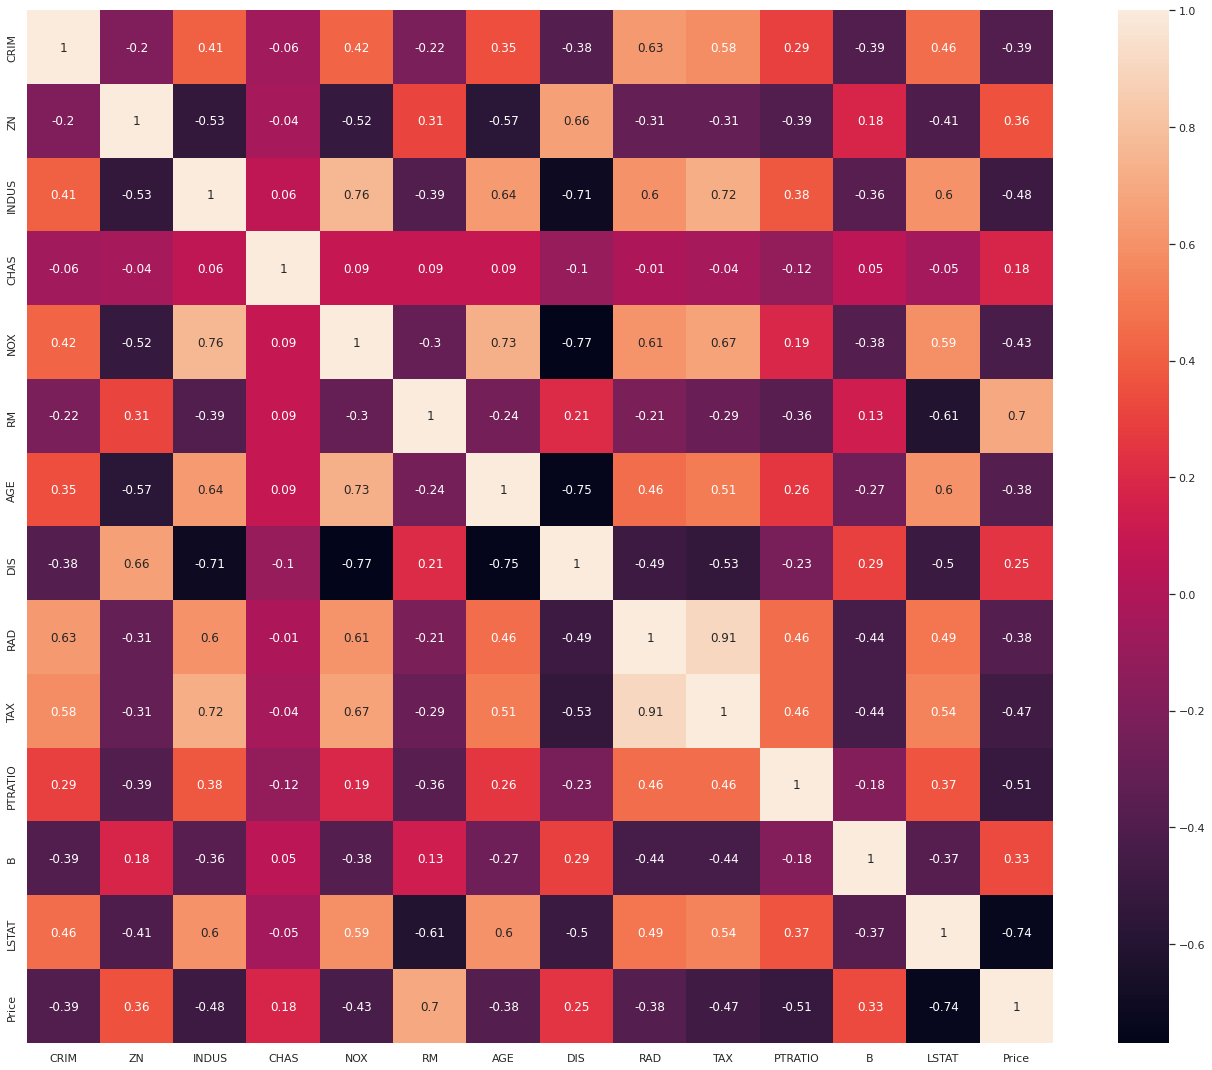

In [ ]:
correlation_matrix = df_boston.corr().round(2)
#round(2) means round to 2 decimal figures
#A correlation matrix is a table showing correlation coefficients between variables.
#Tells how linear the relationships are and how frequent
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix,annot=True)# put the numbers on
#Customization
sns.set(rc = {'figure.figsize':(23,19)})

A large positive value (near to 1.0) indicates a strong positive correlation, i.e., if the balue of one fo the variables increases, the value of the other variable increases as well. A large nagative value (near to -1) indicates a strong negative correlation, i.e., the value of one variable decreases with the other's increasing and vice cersa. A value near to 0 (both negative and positive) indicates the ansence of any correlation by shades of a color. Here, darker shades of the color indicate smaller values whiel brighter shades corresponse to larger values (near to 1). This scale is given with the help of the color-bar on the right side of the plot.

# Write Your Observations

What is a correlation matrix? <br>
What is the difference between correlations (e.g. -1 vs. 1)? <br>
What do the colors on the heatmap means? <br>
Give examples.

A correlation matrix is a data in table format that represents correlations between pairs of variables in a given data. A negative correlation means that as the x-variable increases, the y-variable decreases. It is represented by a Pearson's correlation coefficient. The closer this value is to 1, the stronger the correlation, or more linear the relationship is between the x and y variable.

For instance, DIS vs. NOX has a correlation of -0.77. DIS represents the weighted distance to five Boston employment centers, while NOX represents the nitric oxide concentration (parts per million). This -0.77 correlation means that as the weight distance is larger, the nitric oxide concentration is smaller. This is a moderately strong negative correlation in which means that the NOX value is moderately-heavily weighed upon the DIS value.

We can tell that this is a strong correlation based on the heatmap. The darker the blue hue, the stronger the negative correlation is. The lighter the red-orange hue, the stronger the positive correlation is. From the previous example, we saw that -0.77 for DIS vs. NOX has a dark blue hue on the heatmap, meaning that this has a strong negative correlation.

An example of a strong positive correlation would be INDUS vs. TAX, with a +0.72 correlation, and is represented as a light orange color on the heatmap. This shows that the larger the INDUS value, or the proportion of non-retail businesses acres per town, the greater the TAX value, or the full-value property tax rate per $10,000.


# Preparing the data for training the Machine Learning Model

In [ ]:
# assign features on X axis 
X_features = boston_dataset.data

In [ ]:
# assign target on Y axis 
Y_target = boston_dataset.target

# Build Linear Regression Model

In [ ]:
# import linear model - the estimator
from sklearn.linear_model import LinearRegression
lineReg = LinearRegression()

In [ ]:
# fit data into the the estimator
lineReg.fit(X_features,Y_target)

LinearRegression()

In [ ]:
# The simple linear regression model is essentially a linear equation of the form y = c + b*x; 
#where y is the dependent variable (outcome), x is the independent variable (predictor), b is the
# slope of the line;
# also known as regression coefficient and c is the intercept; labeled as constant.
print('the estimated intercept %.2f '%lineReg.intercept_)

the estimated intercept 36.46 


In [ ]:
# Regression coefficients The Regression Coefficient is the constant 'b' in the regression equation 
#that tells about the change in the value of dependent variable corresponding to the unit change in 
#the independent variable. y = -3.6 + 5.0X1 - 1.8X2, the variables X1 and X2 are multiplied by 5.0 and -1.8, 
#respectively, so the coefficients are 5.0 and -1.8
# print the average coefficient; %d in decimal value
print('the coefficient is %d ' %len(lineReg.coef_))

the coefficient is 13 


# Model Training

In [ ]:
# train model split the whole dataset into train and test datasets
#rule of thumb: the more trained points, the more accurate; ideally 70:30 or 80:20
from sklearn.model_selection import train_test_split
#X_train, X_test, Y_train, Y_test = train_test_split(X_features,Y_target)
X_train, X_test, Y_train, Y_test = train_test_split(X_features,Y_target, train_size=0.8, test_size = 0.2, random_state=15)

In [ ]:
# print the dataset shape
print(boston_dataset.data.shape)

(506, 13)


In [ ]:
# Print shapes of the training and testing data sets
# y only has 1 column for target = price
#404 is 80% of the total 506 data
#102 is 20% of the total 506 data
print( X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)


(404, 13) (102, 13) (404,) (102,)


In [ ]:
# fit the training sets into the model
# a must do
lineReg.fit(X_train,Y_train)

LinearRegression()

# Calculate RMSE and R Square:

# RMSE
Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are; RMSE is a measure of how spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit. Root mean square error is commonly used in climatology, forecasting, and regression analysis to verify experimental results.

RMSE = Square root of [(Sum of predicted values - Sum of observed values)^2/n]

# R Square

R-squared is a statistical measure of how close the data are to the fitted regression line. It is also known as the coefficient of determination,the higher r means ,the higher percentage of points the line passes through when the data points and line are plotted. If the coefficient is 0.80, then 80% of the points should fall within the regression line.The usefulness of R2 is its ability to find the likelihood of future events falling within the predicted outcomes. 

Average error

https://drive.google.com/file/d/1YPzOS2dbKIuVOuYWhCeP9HOs0WcWxGaK/view?usp=sharing


In [ ]:
#Create a prediction model
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
y_train_predict = lineReg.predict(X_train)

In [ ]:
y_test_predict = lineReg.predict(X_test)

In [ ]:
#always use this for rmse
rmse = np.sqrt(mean_squared_error(Y_train,y_train_predict))

RMSE = the standard deviation of the residuals (prediction errors)
Residuals = how far from the regression line data points are
RMSE = how spread out the residuals are

RMSE = 1 means your estimations are really good
RMSE shows the average distance between the observed data values and the predicted data values. If they are small and close, it means it is accurate

R squared = R-squared is a statistical measure of how close the data are to the fitted regression line
0% indicates that the model explains none of the variability of the response data around its mean.
100% indicates that the model explains all the variability of the response data around its mean.
In general, the higher the R-squared, the better the model fits your data. 

R-Squared value of 0.9 would indicate that 90% of the variance of the dependent variable being studied is explained by the variance of the independent variable.


In [ ]:
#The usefulness of R2 is its ability to find the likelihood of future
# events falling within the predicted outcomes.
r2 = r2_score(Y_train, y_train_predict)
print("The model performance for training set")
print("--------------------------------------")
#RMSE is a measure of how spread out these residuals are.
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")
#Measures how good your model is.
#The smaller the RMSE, the less spread out the residuals, the less error.
#About 74.5% of the data will hit the right value. The rest of the 25.5% will be off.
#The higher the R2, the better.

The model performance for training set
--------------------------------------
RMSE is 4.6767075260099835
R2 score is 0.7455344405641732




/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


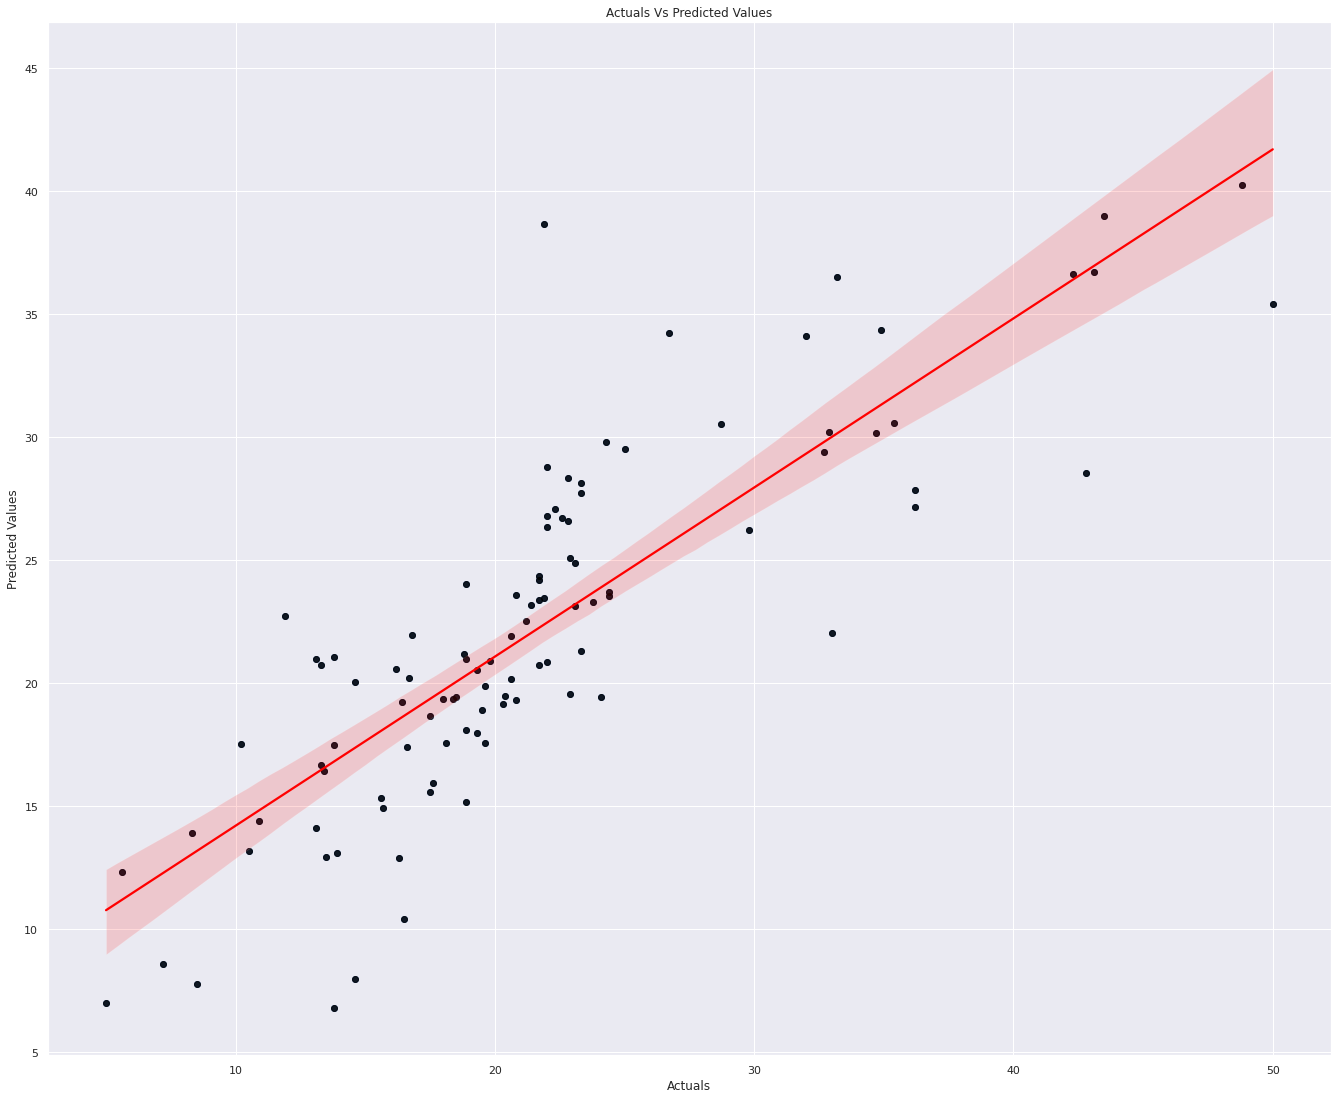

In [ ]:
import pandas as pd
import seaborn as sns
# plotting the y_test vs y_pred
# ideally should have been a straight line

plt.xlabel('Actuals')
plt.ylabel('Predicted Values')
plt.title('Actuals Vs Predicted Values')
scatter=plt.scatter(Y_test, y_test_predict)
regplot=sns.regplot(Y_test, y_test_predict,x="Y_test", y="y_test_predict", data=scatter,
                 scatter_kws={"color": "black"}, line_kws={"color": "red"})

# My Conclusion 

**After examining the correlation matrix using heatmaps:**

Note: We ignore all the 1 correlations because those are comparisons with themselves (outliers)
The highest positive correlations, shaded in light orange on the heatmap are:
- INDUS vs. TAX (0.72)
- RM vs. Price (0.7)
- INDUS vs. NOX (0.76)
- NOX vs. AGE (0.73)

What this means is that the proportion of non-retail business acres per town are directly correlated with on full-value property tax rate per $10,000, and Nitric oxide concentration, and vice versa. The average number of rooms per dwelling also has a direct correlation with the proportion of owner-occupied units built prior to 1940. So as one of these factors increase, the other also increases. It also means that as one of these factors decrease, the other will also decrease.

The highest negative correlations, shaded in dark blue on the heatmap are:
- DIS vs. INDUS (-0.71)
- DIS vs. NOX (-0.77)
- DIS vs. AGE (-0.75)
- LSTAT vs. PRICE (-0.74)

The weighted distances to five Boston employment centers has an inverse relationship with: Proportion of non-retail business acres per town, Nitric oxide concentration, and Proportion of owner-occupied units built prior to 1940. So as the weighted distances to five Boston employment centers gets smaller, these other features get larger, and vice versa.

The percentage of lower status of the population and Proportion of owner-occupied units built prior to 1940 also have a indirect relationship. As one increases, the other will decrease, and vice versa.

**Based on the distribution plot and histogram of price vs. density:**
-	The Least frequent price of housing is around 40,000 dollars.
-	The most frequent price of housing is around 20,000 dollars.



**RMSE** <br>

We calculated the **RMSE**, or Root Mean Square Error to about 4.677. RMSE measures how spread out the residuals are. A 4.677 is a small RMSE value, meaning the residuals are less spread out. We want less distance between the actual and estimated values. This low value a good indicator of less errors.

The **R-squared** measure was about 0.745. This means that about 74.5% of the data will hit the right value. The other 25.5% will be off. 

These can be visualized on the regression plot of actual values vs predicted values where we see that the residuals are less spread out, and that about 74.5% of the predicted values match the actual values.
